In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

加载数据

In [7]:
import sqlite3
conn = sqlite3.connect('data.db')
df = pd.read_sql("SELECT * FROM DATA", conn, index_col="ID", parse_dates=["DATE"])

In [3]:
df.head()

,DATE,LOCATION,LENGTH,TRACK,TRACK_TYPE,TRACK_STATUS,RACE_NUM,H_NO,HORSE_NAME,GEAR,...,H_WT,HCP_WT,C_WT,BAR,JOCKEY,TRAINER,RUNING_POSITION,PI,TOTAL_SECONDS,LBW
ID,,,,,,,,,,,,,,,,,,,,,
2009-01-01-1-3-1,2009-01-01,新加坡,1700,unkonw,(POLYTRACK),良好,1,10,WINNIEDUN,,...,440.0,52.0,52.0,3,M AU,HK TAN,1-1-1,1,0.0,0.0
2009-01-01-1-9-2,2009-01-01,新加坡,1700,unkonw,(POLYTRACK),良好,1,2,REGAL KNIGHT,,...,457.0,59.0,57.0,9,E ASLAM,L TRELOAR,9-5-2,2,0.0,0.5
2009-01-01-1-10-3,2009-01-01,新加坡,1700,unkonw,(POLYTRACK),良好,1,3,JOYLUCK,,...,477.0,58.5,58.5,10,N CALLOW,RB MARSH,11-10-3,3,0.0,1.3
2009-01-01-1-1-4,2009-01-01,新加坡,1700,unkonw,(POLYTRACK),良好,1,1,MAJESTIC KNIGHT,,...,521.0,59.0,55.0,1,T. AFFANDI,L TRELOAR,4-3-4,4,0.0,1.8
2009-01-01-1-8-5,2009-01-01,新加坡,1700,unkonw,(POLYTRACK),良好,1,7,ELEVENTH AVENUE,,...,477.0,54.5,54.5,8,R FRADD,M FREEDMAN,8-8-5,5,0.0,2.6


In [7]:
df.columns

Index(['DATE', 'LOCATION', 'LENGTH', 'TRACK', 'TRACK_TYPE', 'TRACK_STATUS',
       'RACE_NUM', 'H_NO', 'HORSE_NAME', 'GEAR', 'HORSE_RATING', 'H_WT',
       'HCP_WT', 'C_WT', 'BAR', 'JOCKEY', 'TRAINER', 'RUNING_POSITION', 'PI',
       'TOTAL_SECONDS', 'LBW'],
      dtype='object')

In [4]:
df.describe()

,LENGTH,RACE_NUM,H_NO,HORSE_RATING,H_WT,HCP_WT,C_WT,BAR,PI,TOTAL_SECONDS,LBW
count,88110.000000,88110.000000,88110.000000,88110.000000,88110.000000,88110.000000,88110.000000,88110.000000,88110.000000,88110.000000,88110.000000
mean,1331.634321,5.464317,6.324413,47.422812,495.280524,54.975701,54.326813,6.137975,6.339610,79.863567,5.974457
std,256.724820,2.977882,3.494310,20.767828,31.383475,2.532528,2.667349,3.383717,5.787673,20.725862,5.966324
min,1000.000000,1.000000,1.000000,0.000000,372.000000,45.500000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1200.000000,3.000000,3.000000,40.000000,474.000000,53.000000,52.500000,3.000000,3.000000,70.052500,2.100000
50%,1200.000000,5.000000,6.000000,49.000000,494.000000,55.500000,55.000000,6.000000,6.000000,73.650000,4.900000
75%,1600.000000,8.000000,9.000000,59.000000,516.000000,57.000000,56.500000,9.000000,9.000000,94.980000,8.200000
max,2400.000000,12.000000,18.000000,127.000000,647.000000,59.500000,59.500000,16.000000,99.000000,640.980000,99.800000


计算赛马速度

In [24]:
# 去掉total_seconds为零的场次
# 其实我应该讲时间字段的原始数据保存下来的，这里原始数据其实是0:00.00, 但是由于为了怕时间单位一样，但是名次不一样，所以在时间单位上还加了一个名次除以100，假设名次是1，那么1/100 等于10毫秒
# 所以这里应该去掉小于1的数据, 但是数据其实还是有些异常，所以去掉小于50的结果
df2 = df.query("TOTAL_SECONDS > 50")
df2["SPEED"] = df["LENGTH"] / df["TOTAL_SECONDS"]
df2["SPEED"].head()

c:\users\ye\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


ID
2009-04-03-1-8-1     16.605385
2009-04-03-1-5-2     16.568047
2009-04-03-1-7-3     16.560208
2009-04-03-1-10-4    16.554334
2009-04-03-1-3-5     16.495817
Name: SPEED, dtype: float64

计算每匹马的平均速度，以马匹为维度

In [27]:
df2[["SPEED", "HORSE_NAME"]].groupby("HORSE_NAME").mean().sort_values(by="SPEED").tail()

,SPEED
HORSE_NAME,
杰精神,17.266402
天久,17.273643
大魔,17.291066
友莹格,17.376195
才高八斗,17.465668


In [28]:
df2[["SPEED", "HORSE_NAME"]].groupby("HORSE_NAME").mean().sort_values(by="SPEED").head()

,SPEED
HORSE_NAME,
VUVUZELA VROOM,9.323814
SUPER ENOUGH,10.784578
魔圣,12.695374
超级无敌,12.996329
宠儿,13.938513


In [29]:
df2[["SPEED", "HORSE_NAME"]].groupby("HORSE_NAME").mean().sort_values(by="SPEED").mean()

SPEED    16.37356
dtype: float64

结果如预期，速度平均在16m/s左右，速度最大在17m/s左右, 但是速度很慢的却有点奇怪，可能这些马没有跑了吧，研究意义不大

计算每匹马的平均速度，以骑师为维度

In [32]:
df2[["SPEED", "JOCKEY"]].groupby("JOCKEY").mean().sort_values(by="SPEED").tail()

,SPEED
JOCKEY,
麦维凯,16.899374
郗福年,16.952015
薛凯华,16.969355
杜美尔,16.973066
杜利莱,17.204301


In [33]:
df2[["SPEED", "JOCKEY"]].groupby("JOCKEY").mean().sort_values(by="SPEED").head()

,SPEED
JOCKEY,
ALEX CHEW,15.928905
APP J MALLYON,15.975892
区国雄,15.995594
B TAI,16.014973
安得利,16.035108


In [34]:
df2[["SPEED", "JOCKEY"]].groupby("JOCKEY").mean().mean()

SPEED    16.400328
dtype: float64

以马匹角度可视化速度

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ECF570>]],
      dtype=object)

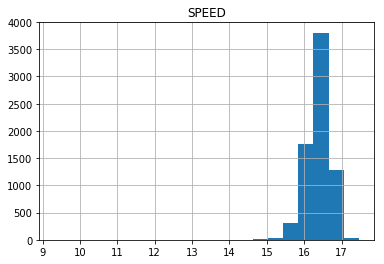

In [36]:
df2[["SPEED", "HORSE_NAME"]].groupby("HORSE_NAME").mean().hist(bins=20)

每次赛马速度大概率在16m/s左右比较合理，但也有很大概率在17m/s以上，而小于15秒属于极少数了，很有可能是因为赛马的特殊情况，比如马匹忽然失去梦想，不想跑了。

- 找一匹历史数据中赛马次数最多的马匹，查看速度的历史规律

In [41]:
speed_and_horse = df2[["SPEED", "HORSE_NAME"]]
pd.value_counts(speed_and_horse["HORSE_NAME"]).head()

乱乱来       89
甜蜜舞曲      77
PACINO    71
太阳帝国      69
白咖啡       68
Name: HORSE_NAME, dtype: int64

这里选择 "乱乱来"作为可视化目标

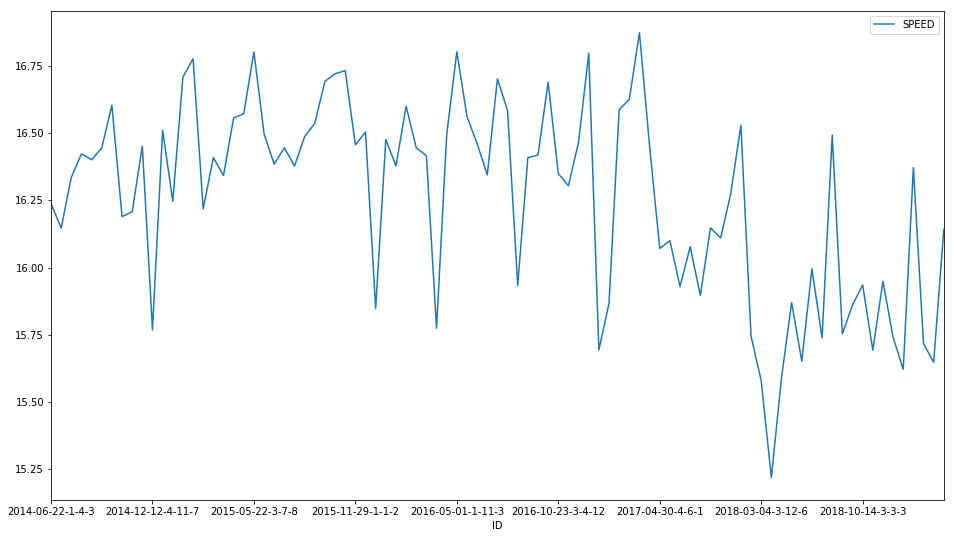

In [45]:
speed_and_horse.query('HORSE_NAME == "乱乱来"').plot(figsize=(16,9))

可以发现这匹马在18年以前基本上还是在16.25左右上下徘徊, 不好不坏， 但是18年以后就不行了，可能老了吧

但是很有可能这是特例，所以我们将出场次数前20的马匹都绘制出来


In [78]:
#  首先看看前二十的马匹
pd.value_counts(speed_and_horse["HORSE_NAME"]).head(20)

乱乱来                89
甜蜜舞曲               77
PACINO             71
太阳帝国               69
白咖啡                68
LUCKY SUN          67
NINTH AVENUE       66
六合兴旺               66
东道主                66
SHINKANSEN         65
DAAD'S THE WAY     65
经典乌龙               64
新邦                 64
INCREDIBLE HULK    64
蓝宝石                64
圣冠                 64
快好                 64
银河快车               64
巨大火球               64
CONQUEST           63
Name: HORSE_NAME, dtype: int64

前二十最少次数63，所以取每匹马的最近的63次作为可视化目标

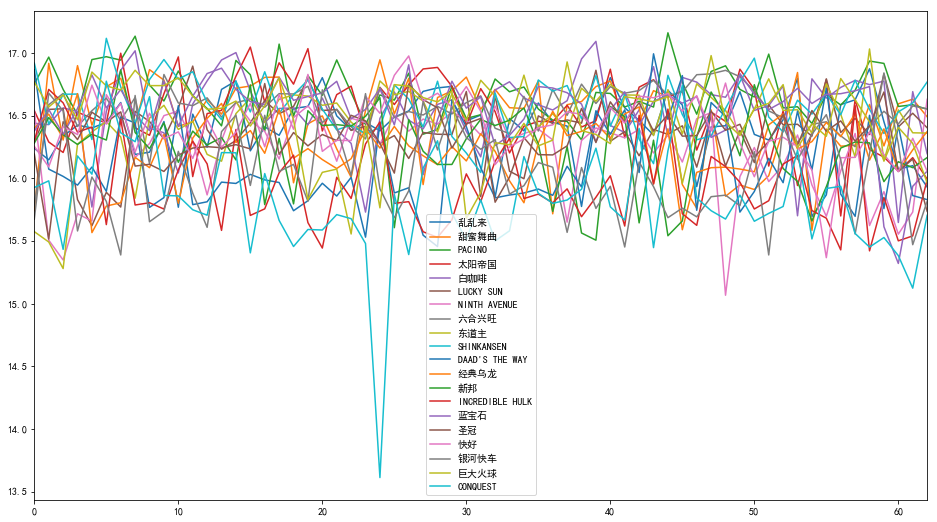

In [79]:
plot_df = pd.DataFrame()
plt.rcParams['font.sans-serif'] = ['simhei']
for horse_name in pd.value_counts(speed_and_horse["HORSE_NAME"]).head(20).index:
    df_horse = speed_and_horse.query(f'HORSE_NAME == "{horse_name}"')["SPEED"].iloc[:63]

    plot_df[horse_name] = df_horse.reset_index()["SPEED"]


plot_df.plot(figsize=(16,9))
# speed_and_horse[list(pd.value_counts(speed_and_horse["HORSE_NAME"]).head(20).index)]

好像看不出什么明显的趋势，很有可能选择的样本有问题, 那就算了吧

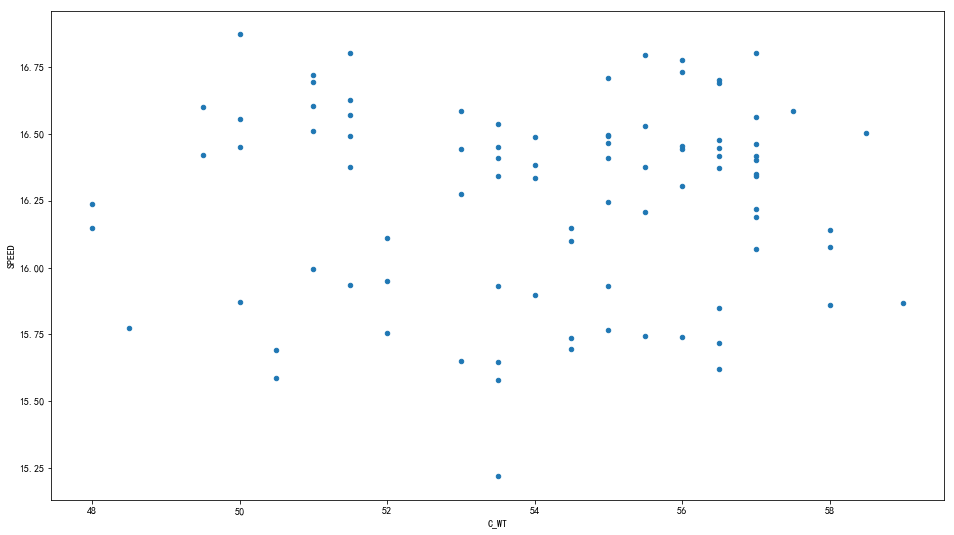

In [93]:
# 这里还是选择查看  "乱乱来"这匹马

df2.query('HORSE_NAME == "乱乱来"')[["C_WT", "SPEED"]].reset_index().plot.scatter(x="C_WT", y="SPEED", figsize=(16,9))

c:\users\ye\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


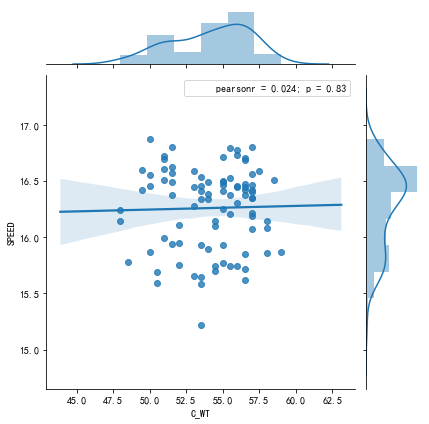

In [106]:
j = sns.jointplot("C_WT", "SPEED", data=df2.query('HORSE_NAME == "乱乱来"')[["C_WT", "SPEED"]].reset_index(), kind="reg")
# j = sns.jointplot('Num of A', ' Ratio B', data = data_df, kind='reg', height=8)
j.annotate(stats.pearsonr)

似乎没啥关系~

再试试horse_rate

c:\users\ye\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


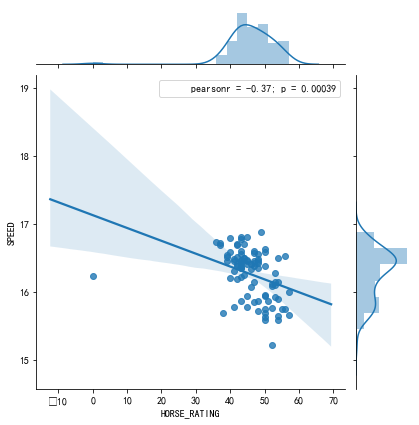

In [108]:
j = sns.jointplot("HORSE_RATING", "SPEED", data=df2.query('HORSE_NAME == "乱乱来"')[["HORSE_RATING", "SPEED"]].reset_index(), kind="reg")
# j = sns.jointplot('Num of A', ' Ratio B', data = data_df, kind='reg', height=8)
j.annotate(stats.pearsonr)

似乎也没啥关系

- 拟合模型 强行线性规划

这里选择 "乱乱来" 这匹马

In [161]:
from sklearn.linear_model import LinearRegression
df_lll = df2.query("HORSE_NAME == '乱乱来'")[["SPEED", "C_WT", "HORSE_RATING"]]
split_index = int(len(df_lll) * 0.6)
X_Train = df_lll[:split_index][["C_WT", "HORSE_RATING"]]
Y_Train = df_lll[:split_index][["SPEED"]
X_Test = df_lll[split_index:][["C_WT", "HORSE_RATING"]]
Y_Test = df_lll[split_index:][["SPEED"]]

model = LinearRegression()
model.fit(X_Train.values, Y_Train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

首先可视化一下

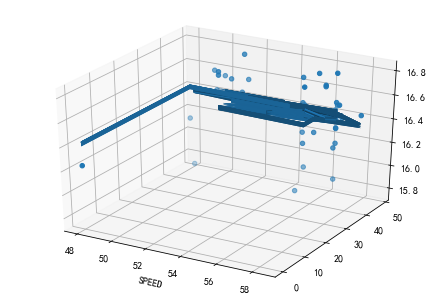

In [163]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("C_WT")
ax.set_xlabel("HORSE_RATING")
ax.set_xlabel("SPEED")
ax.scatter(X_Train["C_WT"].values, X_Train["HORSE_RATING"].values, Y_Train.values)
ax.plot_surface(X_Train["C_WT"].values, X_Train["HORSE_RATING"].values, model.predict(X_Train.values))

事实证明不行

计算计算历史胜率变化

In [110]:
pd.value_counts(df2["JOCKEY"]).head()

B VORSTER    2110
文罗           2070
J MOREIRA    2039
祖格拉          1931
D BEASLEY    1815
Name: JOCKEY, dtype: int64

(array([226.,  39.,  22.,   9.,  16.,   3.,   8.,   2.,   3.,   4.]),
 array([1.0000e+00, 2.1190e+02, 4.2280e+02, 6.3370e+02, 8.4460e+02,
        1.0555e+03, 1.2664e+03, 1.4773e+03, 1.6882e+03, 1.8991e+03,
        2.1100e+03]),
 <a list of 10 Patch objects>)

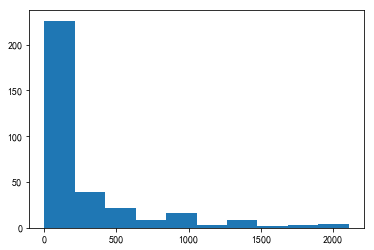

In [116]:
# 顺便看看历史数据中骑师初赛的次数直方图
plt.hist(pd.value_counts(df2["JOCKEY"]).values)

In [112]:
# 这里就选择"B VORSTER"  这个骑师吧。
# 看看总胜率，即他获得第一名的胜率
df_jockey_b = df2.query("JOCKEY == 'B VORSTER'")
len(df2.query("JOCKEY == 'B VORSTER'").query("PI == 1")) / len(df_jockey_b)

0.12654028436018958

似乎不怎么高

In [114]:
len(df2.query("JOCKEY == 'B VORSTER'").query("PI < 4")) / len(df_jockey_b)

0.36492890995260663

似乎也差不多, 居然跟瞎猜的概率差不多。

比如一次出赛10匹马，在不考虑任何指标的情况下，那么随便一匹马跑进前三的概率就是3/10，即0.3.

既然这样看看跑了1000场比赛的以上的骑师，跑进前三的概率分布

> 为啥是1000? 拍脑袋决定的

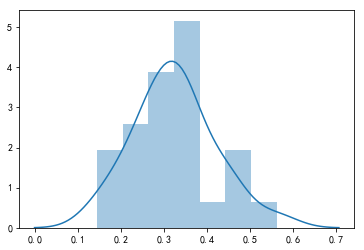

In [146]:
ratio_series = pd.Series()
ser = pd.value_counts(df2["JOCKEY"]) 
for jockey_name in ser[ser > 1000].index:
    df_jockey = df2.query(f'JOCKEY == "{jockey_name}"')
    if len(df_jockey) == 0:
        print(jockey_name)
    success_ratio = len(df_jockey.query("PI < 4")) / len(df_jockey)
    ratio_series[jockey_name] = success_ratio

sns.distplot(ratio_series.values)
# plt.hist(ratio_series.values)
# plt.hist

In [147]:
ratio_series.describe()

count    26.000000
mean      0.323536
std       0.094433
min       0.143531
25%       0.262710
50%       0.323516
75%       0.363641
max       0.561059
dtype: float64